<a href="https://colab.research.google.com/github/syedtariqshah789/ML_Projects/blob/main/House_Sales_in_King_County_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Module 1: Importing Data Sets


The functions below will download the dataset into your browser:


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"syedtariqshah","key":"59e55a5ffcf71f2ba9656d6a5eedeff8"}'}

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [12]:
! kaggle datasets download -d akinbanjiakinyera/house-sales-in-king-county-usa

  0% 0.00/829k [00:00<?, ?B/s]
100% 829k/829k [00:00<00:00, 107MB/s]


In [13]:
!unzip /content/house-sales-in-king-county-usa.zip

Archive:  /content/house-sales-in-king-county-usa.zip
  inflating: House_Sales_in_King_County.csv  


In [14]:
df = pd.read_csv('/content/House_Sales_in_King_County.csv')

We use the method <code>head</code> to display the first 5 columns of the dataframe.


In [15]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Question 1

Display the data types of each column using the function dtypes, then take a screenshot and submit it, include your code in the image.


In [16]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

We use the method describe to obtain a statistical summary of the dataframe.


In [17]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Module 2: Data Wrangling


In [18]:
df.drop(['id','Unnamed: 0'],axis=1,inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We can see we have missing values for the columns <code> bedrooms</code>  and <code> bathrooms </code>


In [19]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


We can replace the missing values of the column <code>'bedrooms'</code> with the mean of the column  <code>'bedrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code>inplace</code> parameter to <code>True</code>


In [20]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

We also replace the missing values of the column <code>'bathrooms'</code> with the mean of the column  <code>'bathrooms' </code> using the method <code>replace()</code>. Don't forget to set the <code> inplace </code>  parameter top <code> True </code>


In [21]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [22]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Module 3: Exploratory Data Analysis


In [23]:
floor_value=df['floors'].value_counts().to_frame()
floor_value.rename(columns={'floors': 'Number of Houses'},inplace = True)
floor_value.index.name='Floors'
floor_value

,Number of Houses
Floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


<Axes: xlabel='waterfront', ylabel='price'>

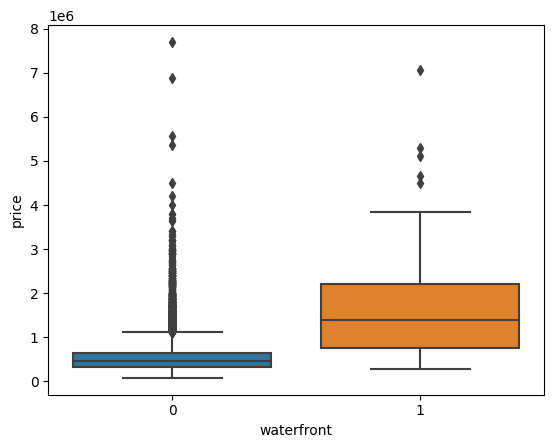

In [24]:
sns.boxplot(x='waterfront',y='price',data=df)
# houses without waterfront have more price outliers.

(0.0, 8081250.0)

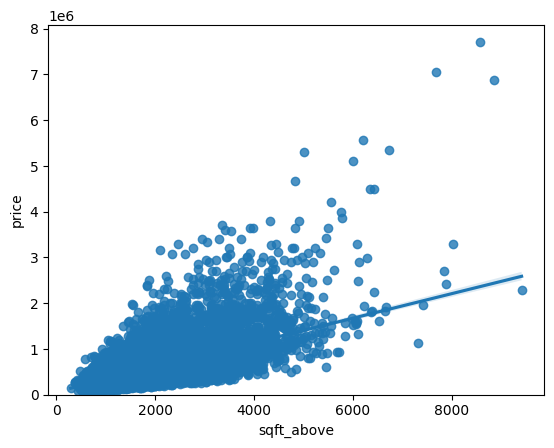

In [25]:
sns.regplot(x='sqft_above',y='price',data=df)
plt.ylim(0,)
# sqft_above is positively correlated with the price.

We can use the Pandas method <code>corr()</code>  to find the feature other than price that is most correlated with price.


In [26]:
df.corr()['price'].sort_values()

<ipython-input-26-78b4f396fb2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['price'].sort_values()


zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

# Module 4: Model Development


We can Fit a linear regression model using the  longitude feature <code>'long'</code> and  caculate the R^2.


In [27]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

In [28]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(df[['sqft_living']],df[['price']],test_size=0.2,random_state=0)
lm=LinearRegression()
lm.fit(train_x,train_y)
print('Intercept= ',lm.intercept_)
print('Co-efficient= ',lm.coef_)
yhat=lm.predict(test_x)
print('Predictions for Price: ',yhat[0:5])
print('R^2 Score of train_x and train_y=',lm.score(train_x,train_y))
print('R^2 Score of test_x and test_y=',lm.score(test_x,test_y))

Intercept=  [-48257.06359103]
Co-efficient=  [[283.96855716]]
Predictions for Price:  [[ 357817.97314081]
 [1277876.09832343]
 [ 360657.65871236]
 [ 272627.40599427]
 [ 854762.94816228]]
R^2 Score of train_x and train_y= 0.49552283606032776
R^2 Score of test_x and test_y= 0.47915772372653753


In [29]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

In [30]:
features =df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(features,df[['price']],test_size=0.2,random_state=0)
lm=LinearRegression()
lm.fit(train_x,train_y)
print('Intercept= ',lm.intercept_)
print('Co-efficient= ',lm.coef_)
yhat=lm.predict(test_x)
print('Predictions for Price: ',yhat[0:5])
print('R^2 Score of train_x and train_y=',lm.score(train_x,train_y))
print('R^2 Score of test_x and test_y=',lm.score(test_x,test_y))

Intercept=  [-32543566.55932245]
Co-efficient=  [[-2.73908369e+04  6.26971650e+05  6.76430571e+05 -2.56406477e+04
   6.55224026e+01  6.70935172e+04 -5.14496645e+03  5.90962046e+00
   6.70010093e+01  7.90700237e+04  1.32523412e+02]]
Predictions for Price:  [[ 443278.03412994]
 [1409755.31840496]
 [ 468781.73325069]
 [ 468290.13692484]
 [1095189.45778261]]
R^2 Score of train_x and train_y= 0.6588054317085607
R^2 Score of test_x and test_y= 0.6513626732322884


In [31]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [32]:
pipe=Pipeline(Input)
features =df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(features,df[['price']],test_size=0.2,random_state=0)
pipe.fit(train_x,train_y)
yhat=pipe.predict(test_x)
print('Predictions for Price: ',yhat[0:5])
print('R^2 Score of train_x and train_y=',pipe.score(train_x,train_y))
print('R^2 Score of test_x and test_y=',pipe.score(test_x,test_y))

Predictions for Price:  [[ 441125.625]
 [1547510.25 ]
 [ 425813.125]
 [ 428350.   ]
 [ 972010.5  ]]
R^2 Score of train_x and train_y= 0.7550500011433267
R^2 Score of test_x and test_y= 0.7301224628898544


# Module 5: Model Evaluation and Refinement


Import the necessary modules:


In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


We will split the data into training and testing sets:


In [34]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [35]:
from sklearn.linear_model import Ridge

In [36]:
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train,y_train)
yhat=RidgeModel.predict(x_test)
print('Predictions for Price: ',yhat[0:5])
print('R^2 Score of train_x and train_y=',RidgeModel.score(x_train,y_train))
print('R^2 Score of test_x and test_y=',RidgeModel.score(x_test,y_test))

Predictions for Price:  [651781.17964157 514958.12791318 794388.65874943 702639.20038573
 213504.66481975]
R^2 Score of train_x and train_y= 0.659437853495024
R^2 Score of test_x and test_y= 0.6478759163939112


In [37]:
from sklearn.preprocessing import PolynomialFeatures
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]
X = df[features]
Y = df['price']
pr=PolynomialFeatures(degree=2)
X_pr= pr.fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X_pr, Y, test_size=0.15, random_state=1)
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train,y_train)
yhat=RidgeModel.predict(x_test)
print('Predictions for Price: ',yhat[0:5])
print('R^2 Score of train_x and train_y=',RidgeModel.score(x_train,y_train))
print('R^2 Score of test_x and test_y=',RidgeModel.score(x_test,y_test))

Predictions for Price:  [569564.08585656 487971.29633738 676763.60726373 690525.95949347
 327321.52350959]
R^2 Score of train_x and train_y= 0.7418167438683128
R^2 Score of test_x and test_y= 0.700274426790608
